In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, spearmanr

In [2]:
# Load your CSV file
df = pd.read_csv('TSS_all_Algorithm_global_filtered_data.csv')

# Extract the first column and the other 9 columns
X = df.iloc[:, 0].values.reshape(-1, 1)
columns = df.columns[1:]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


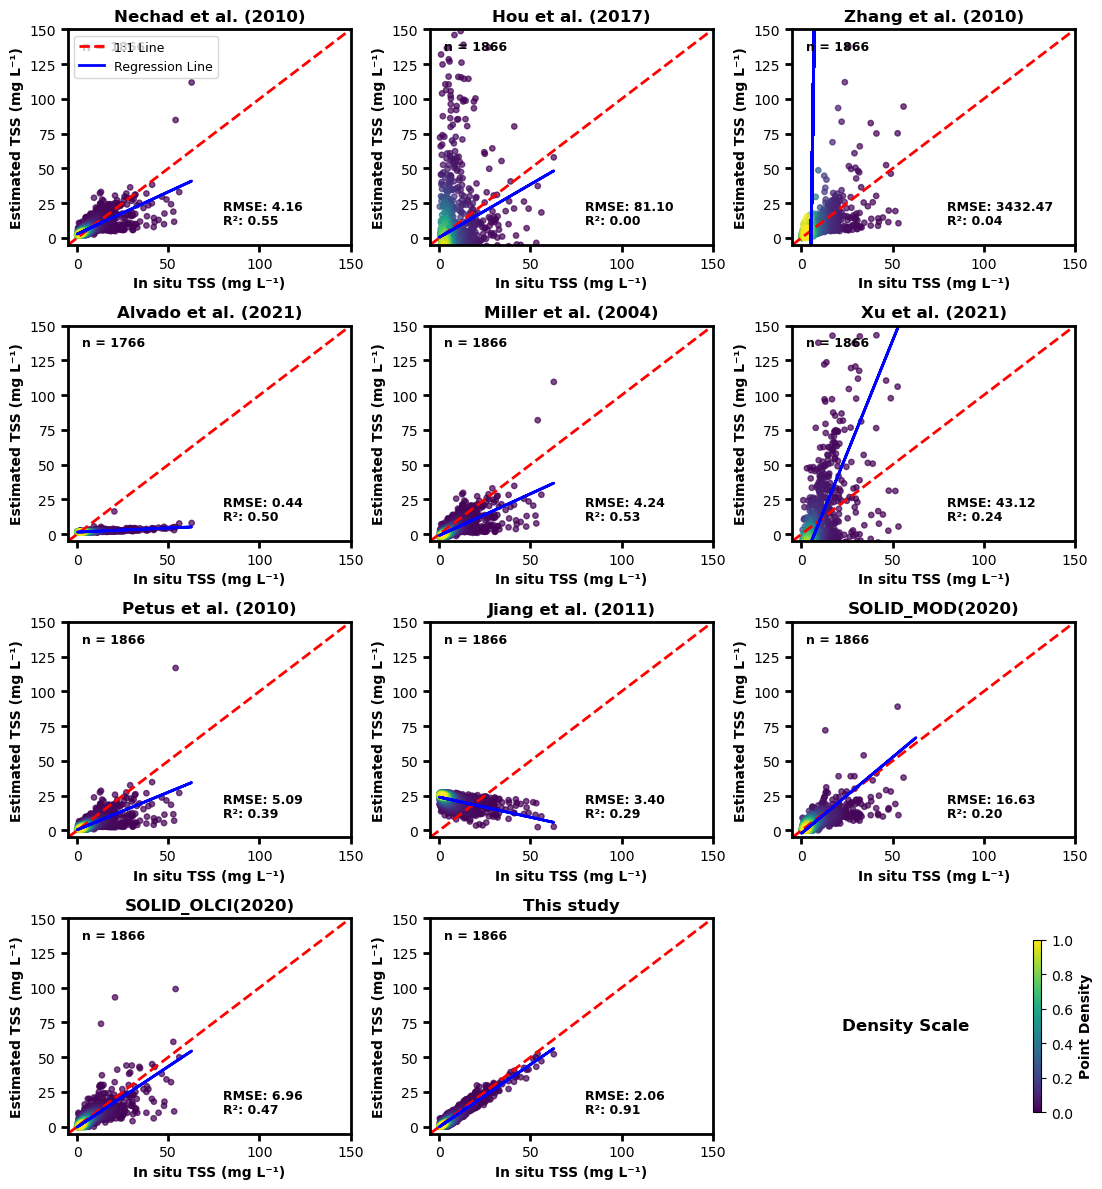

Data quality summary:
Total columns: 12
First column (X): TSS
Column 1 (Nechad): 1866 valid data points out of 1866
Column 2 (Hou): 1866 valid data points out of 1866
Column 3 (Zhang): 1866 valid data points out of 1866
Column 4 (Alvado): 1766 valid data points out of 1866
Column 5 (Miller): 1866 valid data points out of 1866
Column 6 (Xu): 1866 valid data points out of 1866
Column 7 (Petus): 1866 valid data points out of 1866
Column 8 (Jiang): 1866 valid data points out of 1866
Column 9 (SOLID_MOD): 1866 valid data points out of 1866
Column 10 (SOLID_OLCI): 1866 valid data points out of 1866
Column 11 (Masud): 1866 valid data points out of 1866


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import gaussian_kde

# Load your CSV file
df = pd.read_csv('TSS_all_Algorithm_global_filtered_data.csv')

# Extract the first column and the other columns
X_all = df.iloc[:, 0].values.reshape(-1, 1)
columns = df.columns[1:]

# Create subplots for 11 columns (4x3 grid) with square shape
fig, axes = plt.subplots(4, 3, figsize=(12, 12))  # Square figure size
axes = axes.flatten()

# Years corresponding to columns 2–12 (indices 1–11 in the dataframe)
yrs = ['(2010)', '(2017)', '(2010)', '(2021)', '(2004)', '(2021)', 
       '(2010)', '(2011)', '(2020)', '(2020)', '(2025)']

# Loop through all 11 columns (from index 1 to 11)
for i in range(1, 12):
    if i >= len(df.columns):
        # If we don't have enough columns, break early
        break
       
    Y_all = df.iloc[:, i].values.reshape(-1, 1)
   
    # Remove rows with NaN values in either X or Y
    valid_mask = ~(np.isnan(X_all.flatten()) | np.isnan(Y_all.flatten()))
    X = X_all[valid_mask].flatten()
    Y = Y_all[valid_mask].flatten()
   
    # Skip if no valid data
    if len(X) == 0:
        print(f"Skipping column {df.columns[i]} - no valid data")
        axes[i-1].text(0.5, 0.5, 'No valid data', transform=axes[i-1].transAxes,
                      ha='center', va='center', fontweight='bold')
        axes[i-1].set_xlim(-5, 150)
        axes[i-1].set_ylim(-5, 150)
        axes[i-1].set_xlabel('In situ TSS (mg L⁻¹)', fontweight='bold')
        axes[i-1].set_ylabel('Estimated TSS (mg L⁻¹)', fontweight='bold')
        continue
   
    # Linear regression
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
    Y_pred = model.predict(X.reshape(-1, 1))
   
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(Y, Y_pred))
    r_squared = r2_score(Y, Y_pred)
   
    # Calculate point density for coloring
    xy = np.vstack([X, Y])
    z = gaussian_kde(xy)(xy)
   
    # Sort points by density for better visualization
    idx = z.argsort()
    X_sorted, Y_sorted, z_sorted = X[idx], Y[idx], z[idx]
   
    # Plot scatter with density coloring
    scatter = axes[i-1].scatter(X_sorted, Y_sorted, c=z_sorted, cmap='viridis', s=15, alpha=0.7)
   
    # Plot 1:1 line and regression line
    axes[i-1].plot([-5, 150], [-5, 150], color='red', linestyle='--', linewidth=2,
                  label='1:1 Line' if i == 1 else "")
    axes[i-1].plot(X, Y_pred, color='blue', linewidth=2,
                  label='Regression Line' if i == 1 else "")
   
    # Set axis limits
    axes[i-1].set_xlim(-5, 150)
    axes[i-1].set_ylim(-5, 150)
   
    # Set labels
    axes[i-1].set_xlabel('In situ TSS (mg L⁻¹)', fontweight='bold')
    axes[i-1].set_ylabel('Estimated TSS (mg L⁻¹)', fontweight='bold')
   
    # === TITLE HANDLING ===
    if i == 11:  # 11th subplot (last one)
        axes[i-1].set_title("This study", fontweight='bold')
    elif i in [9, 10]:  # Columns 9 & 10 → no "et al."
        axes[i-1].set_title(f"{df.columns[i] + yrs[i-1]}", fontweight='bold')
    else:
        axes[i-1].set_title(f"{df.columns[i] + ' et al. ' + yrs[i-1]}", fontweight='bold')
   
    # Add statistics text
    axes[i-1].text(0.05, 0.95, f'n = {len(X)}', transform=axes[i-1].transAxes,
                  fontweight='bold', verticalalignment='top', fontsize=9)
    axes[i-1].text(80, 20, f'RMSE: {rmse:.2f}', fontweight='bold', fontsize=9)
    axes[i-1].text(80, 10, f'R²: {r_squared:.2f}', fontweight='bold', fontsize=9)
   
    # Thicker axis lines
    for spine in axes[i-1].spines.values():
        spine.set_linewidth(2)
   
    axes[i-1].tick_params(axis='both', which='major', labelsize=10, labelcolor='black', width=2, length=5)

# Legend only on the first subplot
axes[0].legend(loc='upper left', fontsize=9)

# Colorbar in the 12th empty subplot
if len(axes) > 11:
    axes[11].set_visible(True)
    dummy = axes[11].scatter([], [], c=[], cmap='viridis')
    axes[11].axis('off')
    cbar = plt.colorbar(dummy, ax=axes[11], shrink=0.8, location='right')
    cbar.set_label('Point Density', fontweight='bold', fontsize=10)
    axes[11].text(0.5, 0.5, 'Density Scale', transform=axes[11].transAxes,
                  ha='center', va='center', fontweight='bold', fontsize=12)
else:
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    dummy = plt.scatter([], [], c=[], cmap='viridis')
    cbar = plt.colorbar(dummy, cax=cbar_ax)
    cbar.set_label('Point Density', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(right=0.90)  # Make room for colorbar

# Save figures in multiple formats
plt.savefig('Scatter_global_data_TSS_all_algorithm.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('Scatter_global_data_TSS_all_algorithm.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('Scatter_global_data_TSS_all_algorithm.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

# Print summary of data quality
print("Data quality summary:")
print(f"Total columns: {len(df.columns)}")
print(f"First column (X): {df.columns[0]}")
for i in range(1, min(12, len(df.columns))):
    valid_mask = ~(np.isnan(df.iloc[:, 0]) | np.isnan(df.iloc[:, i]))
    valid_count = np.sum(valid_mask)
    print(f"Column {i} ({df.columns[i]}): {valid_count} valid data points out of {len(df)}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


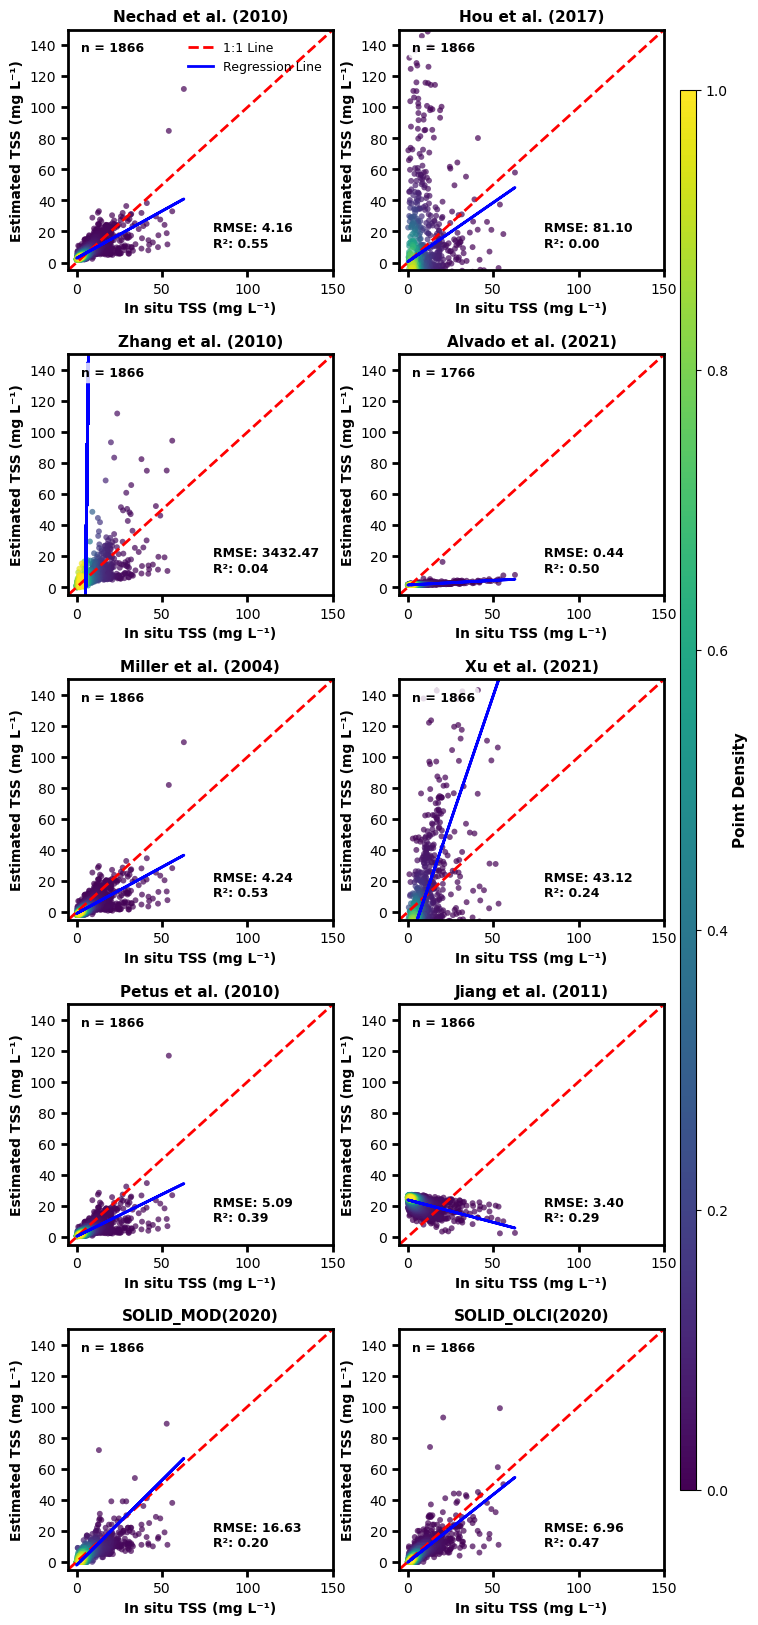

Data quality (first 10 algorithms):
Nechad                              → 1866 valid points
Hou                                 → 1866 valid points
Zhang                               → 1866 valid points
Alvado                              → 1766 valid points
Miller                              → 1866 valid points
Xu                                  → 1866 valid points
Petus                               → 1866 valid points
Jiang                               → 1866 valid points
SOLID_MOD                           → 1866 valid points
SOLID_OLCI                          → 1866 valid points


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import gaussian_kde

# Load data
df = pd.read_csv('TSS_all_Algorithm_global_filtered_data.csv')
X_all = df.iloc[:, 0].values.reshape(-1, 1)

# Years for the first 10 algorithms only
yrs = ['(2010)', '(2017)', '(2010)', '(2021)', '(2004)',
       '(2021)', '(2010)', '(2011)', '(2020)', '(2020)']

# Create 5×2 grid of SQUARE subplots
fig, axes = plt.subplots(5, 2, figsize=(8, 20))  # 8×20 ensures each subplot is ~4×4 (square)
axes = axes.flatten()

for i in range(1, 11):  # Columns 1 to 10 → subplots 0 to 9
    ax = axes[i-1]
    Y_all = df.iloc[:, i].values.reshape(-1, 1)

    # Remove NaN pairs
    valid = ~(np.isnan(X_all.flatten()) | np.isnan(Y_all.flatten()))
    X = X_all[valid].flatten()
    Y = Y_all[valid].flatten()

    if len(X) == 0:
        ax.text(0.5, 0.5, 'No valid data', transform=ax.transAxes,
                ha='center', va='center', fontsize=12, fontweight='bold')
        ax.set_xlim(-5, 150); ax.set_ylim(-5, 150)
        ax.set_xlabel('In situ TSS (mg L⁻¹)', fontweight='bold')
        ax.set_ylabel('Estimated TSS (mg L⁻¹)', fontweight='bold')
        continue

    # Regression
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), Y)
    Y_pred = model.predict(X.reshape(-1, 1)).flatten()
    rmse = np.sqrt(mean_squared_error(Y, Y_pred))
    r2 = r2_score(Y, Y_pred)

    # Density coloring
    xy = np.vstack([X, Y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    X_s, Y_s, z_s = X[idx], Y[idx], z[idx]

    # Scatter plot
    scatter = ax.scatter(X_s, Y_s, c=z_s, cmap='viridis', s=18, alpha=0.7, edgecolors='none')

    # 1:1 and regression lines
    ax.plot([-5, 150], [-5, 150], 'r--', lw=2, label='1:1 Line' if i==1 else "")
    ax.plot(X, Y_pred, 'b-', lw=2, label='Regression Line' if i==1 else "")

    # Axis settings
    ax.set_xlim(-5, 150)
    ax.set_ylim(-5, 150)
    ax.set_xlabel('In situ TSS (mg L⁻¹)', fontweight='bold', fontsize=10)
    ax.set_ylabel('Estimated TSS (mg L⁻¹)', fontweight='bold', fontsize=10)

    # === Original title logic exactly preserved ===
    if i in [9, 10]:  # Original columns 9 & 10 (now still 9 & 10) → no "et al."
        title = f"{df.columns[i]}{yrs[i-1]}"
    else:
        title = f"{df.columns[i]} et al. {yrs[i-1]}"
    ax.set_title(title, fontweight='bold', fontsize=11)

    # Stats
    ax.text(0.05, 0.95, f'n = {len(X)}', transform=ax.transAxes, fontweight='bold',
            verticalalignment='top', fontsize=9, bbox=dict(boxstyle="round", fc="white", ec="none", alpha=0.8))
    ax.text(80, 20, f'RMSE: {rmse:.2f}', fontweight='bold', fontsize=9)
    ax.text(80, 10, f'R²: {r2:.2f}', fontweight='bold', fontsize=9)

    # Thick spines and ticks
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(axis='both', which='major', labelsize=10, width=2, length=5)

# Legend only on first subplot, top-right
axes[0].legend(loc='upper right', fontsize=9, frameon=False)

# Colorbar on the right
fig.subplots_adjust(right=0.87, hspace=0.35, wspace=0.25)  # Tight but readable spacing
cbar_ax = fig.add_axes([0.89, 0.15, 0.02, 0.7])
dummy = plt.scatter([], [], c=[], cmap='viridis')
cbar = plt.colorbar(dummy, cax=cbar_ax)
cbar.set_label('Point Density', fontweight='bold', fontsize=11)

# Save with new clear names
plt.savefig('Scatter_global_10_algorithms_5x2_square.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('Scatter_global_10_algorithms_5x2_square.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('Scatter_global_10_algorithms_5x2_square.png', format='png', dpi=600, bbox_inches='tight')

plt.show()

# Data summary
print("Data quality (first 10 algorithms):")
for i in range(1, 11):
    valid = ~(np.isnan(df.iloc[:, 0]) | np.isnan(df.iloc[:, i]))
    print(f"{df.columns[i]:<35} → {valid.sum():>4} valid points")

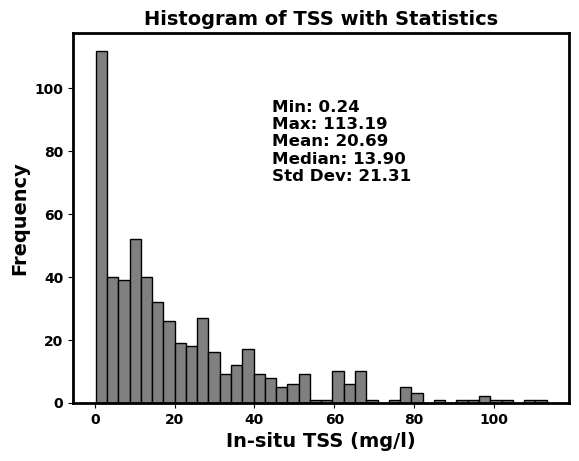

In [54]:
# Create a histogram
plt.hist(X, bins=40, edgecolor='black', color= 'grey', density=False)

# Calculate and display statistics
min_value = X.min()
max_value = X.max()
mean_value = X.mean()
median_value = np.median(X)
std_dev = X.std()
first_quartile = np.quantile(data, 0.25)

text = f"Min: {min_value:.2f}\nMax: {max_value:.2f}\nMean: {mean_value:.2f}\nMedian: {median_value:.2f}\nStd Dev: {std_dev:.2f}"
# text = f"Min: {min_value:.2f}\nMax: {max_value:.2f}\nMean: {mean_value:.2f}\nMedian: {median_value:.2f}\nStd Dev: {std_dev:.2f}\nFirst Quartile: {first_quartile:.2f}"
# Set font weight and line width for text and plot boundary
plt.rc('font', weight='bold')
plt.rc('axes', linewidth=2)
plt.text(0.4, 0.6, text, transform=plt.gca().transAxes, fontsize=12)

plt.xlabel("In-situ TSS (mg/l)",fontsize=14, fontweight='bold')
plt.ylabel("Frequency",fontsize=14, fontweight='bold')
plt.title("Histogram of TSS with Statistics", fontsize=14, fontweight='bold')
plt.savefig('Histogram_TSS.svg', format='svg')
plt.savefig('Histogram_TSS.eps', format='eps')
plt.savefig('Histogram_TSS.pdf', format='pdf')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Generate random data
x = np.random.rand(100) * 100
y = np.random.rand(100) * 100

# Calculate the linear regression on original values
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the scatter plot with log-log scale
plt.scatter(x, y)
plt.xscale('log')
plt.yscale('log')

# Generate points for the regression line on the original scale
line_x = np.linspace(min(x), max(x), 100)
line_y = slope * line_x + intercept

# Plot the regression line on the log-log scale
plt.plot(line_x, line_y, color='red')

# Add labels and title
plt.xlabel('X-axis (log scale)')
plt.ylabel('Y-axis (log scale)')
plt.title('Scatter Plot with Log-Log Scale and Regression Line')

plt.grid(True)
plt.show()